### step 1. Import Nacessary Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2. Create Data Frame

In [4]:
data = pd.read_csv(r'Zomato_data .csv')

In [5]:
data.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


### step 3. convert the data type of the 'rate' column to flot and remove the denominator

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
data['rate'] = data['rate'].str.split('/').str[0].astype(float)

In [13]:
data.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


- Null value check

In [15]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Type of restaurant

C:\Users\acer\AppData\Local\Temp\ipykernel_15888\421201872.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['listed_in(type)'],palette=['b', 'y', 'g', 'r'])


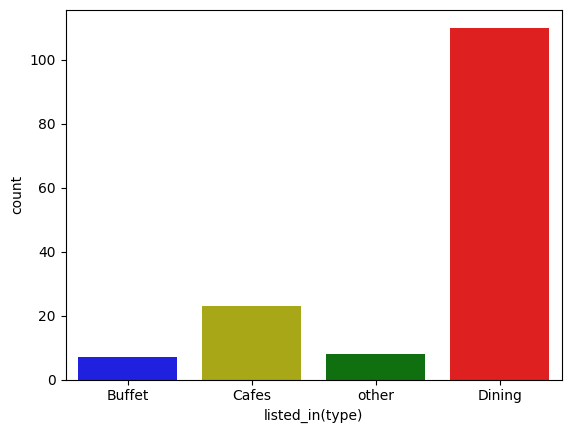

In [22]:
sns.countplot(x=data['listed_in(type)'],palette=['b', 'y', 'g', 'r'])
plt.show()

#### Conclusion: 
##### 1. The majority of the restaurant fall into the dining category
##### 2. Dining restaurant are preferred by a larger number of individuals

In [25]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

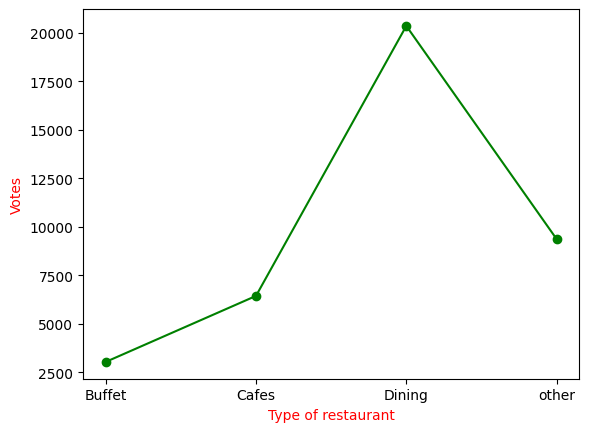

In [32]:
plt.plot(grouped_data,c='green',marker='o')
plt.xlabel('Type of restaurant',c='r',size=10)
plt.ylabel('Votes',c='r',size=10)
plt.show()

##### The majority of restaurant received rating

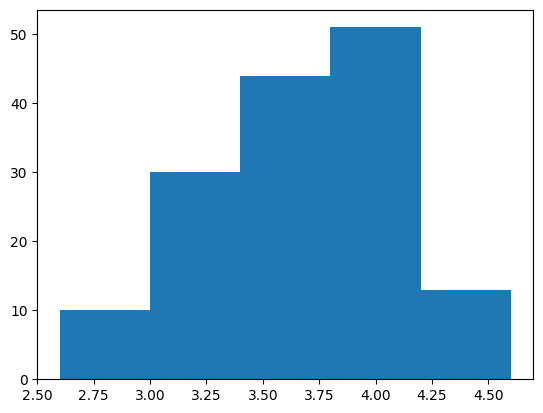

In [38]:
plt.hist(data['rate'],bins=5)
plt.show()

#### Conclusion:
##### The majority of restaurant received ratings ranging frorm 3.5 to 4

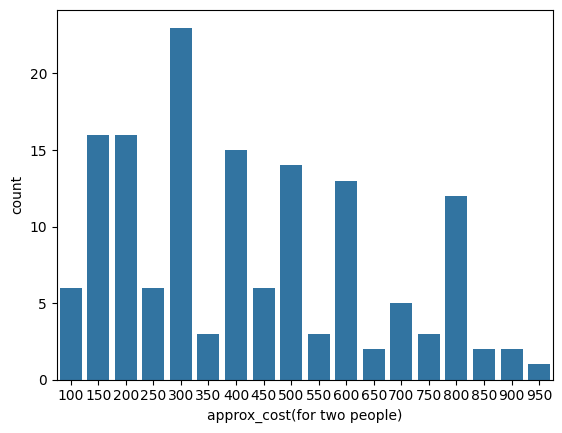

In [44]:
sns.countplot(x=data['approx_cost(for two people)'])
plt.show()

#### Conclusion:
##### The majority of couples prefer restaurants with an approximate cost of 300 rupees

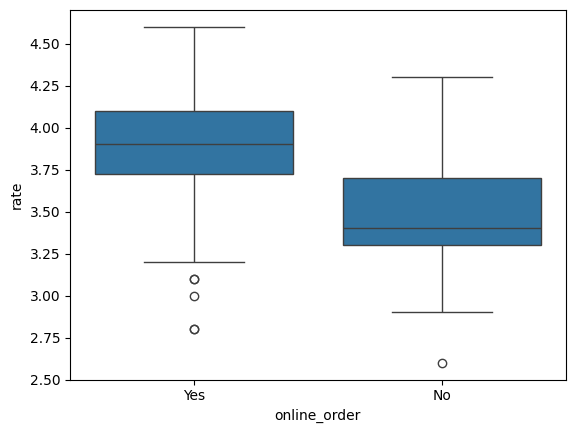

In [47]:
sns.boxplot(x='online_order',y='rate',data=data)
plt.show()

#### Conclusion :
##### Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings

In [51]:
pivot_table = data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)

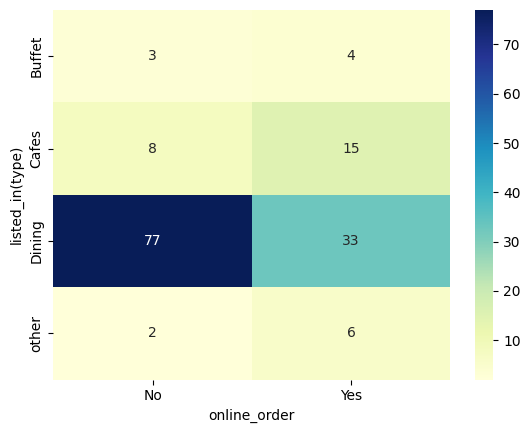

In [53]:
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.show()

#### Conclusion :
##### Dining restaurants primarily accept offline orders, where as cafes primarily receive online orders. 
 ##### This suggests that clients prefer to place orders in person at restaurants , but prefer online ordering at cafes